1. importing required libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score

In [45]:
%pip install pandas numpy matplotlib seaborn scikit-learn xgboost  joblib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
%pip install lightgbm catboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

2. loading the dataset

In [48]:
dataset = pd.read_csv("House_Price_Data.csv")
dataset.head()

,bhk,propertytype,location,sqft,pricepersqft,totalprice
0,3,Flat,Ahmedabad,1346,6233,15700000
1,4,Flat,Ahmedabad,1872,4873,17500000
2,4,Flat,Ahmedabad,1650,6733,20200000
3,5,Flat,Ahmedabad,10201,8499,86700000
4,3,Flat,Ahmedabad,968,5944,10400000


In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14119 entries, 0 to 14118
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   bhk           14119 non-null  int64 
 1   propertytype  14119 non-null  object
 2   location      14119 non-null  object
 3   sqft          14119 non-null  int64 
 4   pricepersqft  14119 non-null  int64 
 5   totalprice    14119 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 662.0+ KB


In [50]:
dataset.shape

(14119, 6)

3. Data Processing

In [51]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

Categorical variables: 2


In [52]:
int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

Integer variables: 4


In [53]:
fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Float variables: 0


In [54]:
dataset.columns

Index(['bhk', 'propertytype', 'location', 'sqft', 'pricepersqft',
       'totalprice'],
      dtype='object')

In [55]:
dataset.isnull().sum()

bhk             0
propertytype    0
location        0
sqft            0
pricepersqft    0
totalprice      0
dtype: int64

4. Exploratory Data Analysis

In [56]:
numerical_dataset = dataset.select_dtypes(include=['number'])

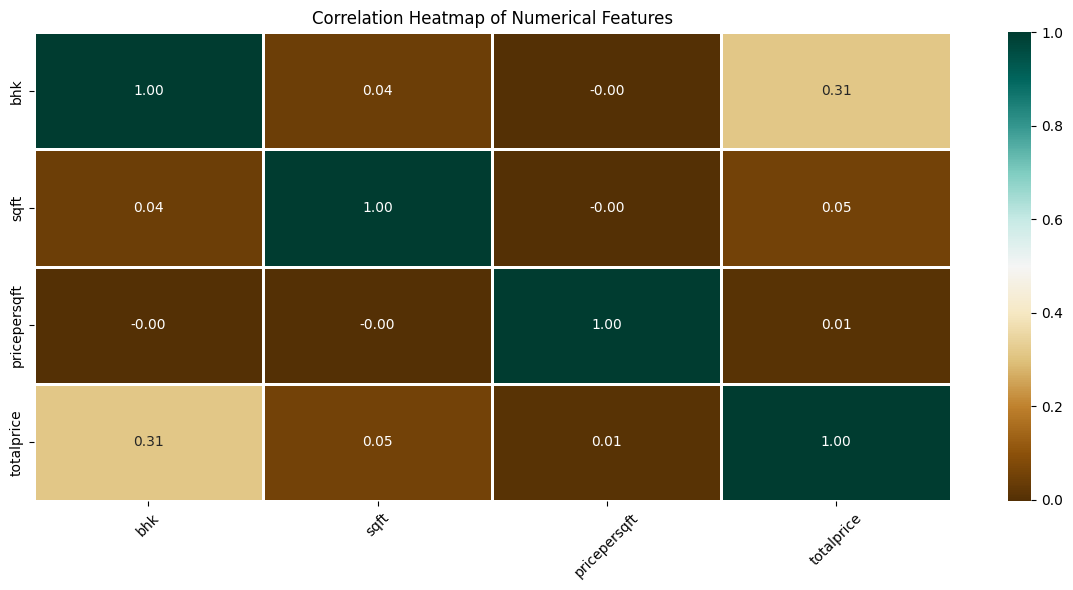

In [57]:
# Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(), cmap='BrBG', annot=True, fmt=".2f", linewidths=2)
plt.title("Correlation Heatmap of Numerical Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\harin\AppData\Local\Temp\ipykernel_6884\2246554819.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_df, x='Feature', y='Unique_Count', palette='Set2')


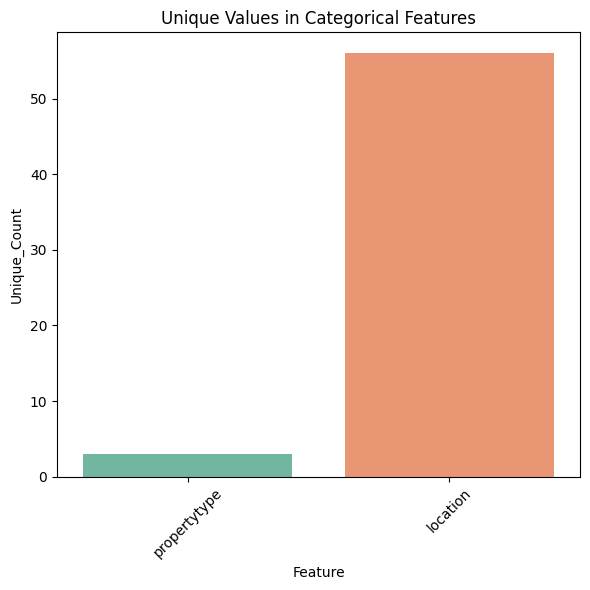

In [58]:
# Unique Values in Categorical Features
unique_values = [dataset[col].nunique() for col in object_cols]
cat_df = pd.DataFrame({'Feature': object_cols, 'Unique_Count': unique_values})
plt.figure(figsize=(6, 6))
sns.barplot(data=cat_df, x='Feature', y='Unique_Count', palette='Set2')
plt.title('Unique Values in Categorical Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

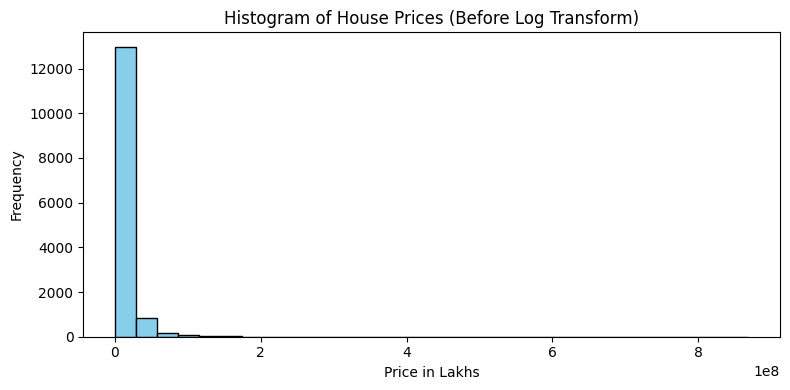

In [59]:
# Histogram of Prices
plt.figure(figsize=(8, 4))
plt.hist(dataset['totalprice'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of House Prices (Before Log Transform)')
plt.xlabel('Price in Lakhs')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


C:\Users\harin\AppData\Local\Temp\ipykernel_6884\3490571055.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='propertytype', data=dataset, palette='pastel')


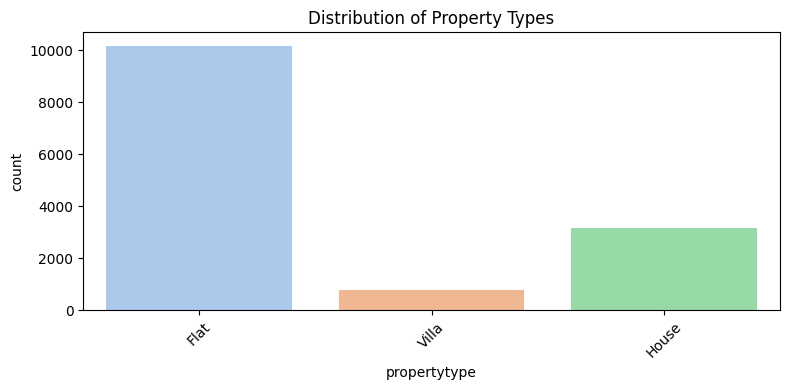

In [60]:
#distribution of property types
plt.figure(figsize=(8, 4))
sns.countplot(x='propertytype', data=dataset, palette='pastel')
plt.title('Distribution of Property Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\harin\AppData\Local\Temp\ipykernel_6884\3062941144.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\harin\AppData\Local\Temp\ipykernel_6884\3062941144.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


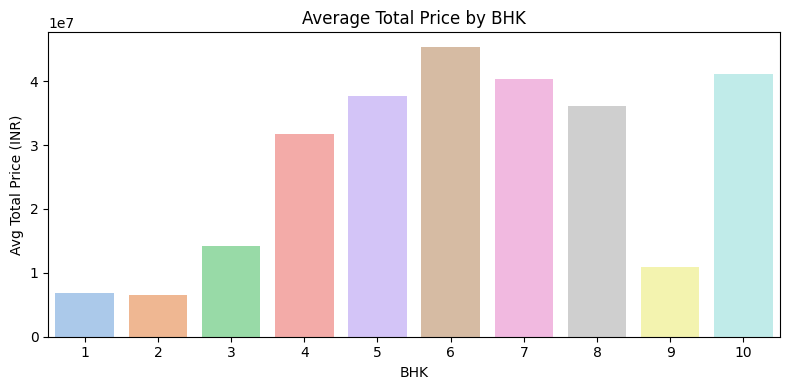

In [61]:

plt.figure(figsize=(8,4))

# Barplot of average total price by BHK
sns.barplot(
    x='bhk', 
    y='totalprice', 
    data=dataset, 
    estimator=np.mean, 
    ci=None, 
    palette='pastel'
)

plt.title('Average Total Price by BHK')
plt.ylabel('Avg Total Price (INR)')
plt.xlabel('BHK')
plt.tight_layout()

plt.savefig('bar_bhk_price.png')
plt.show()


5. Data Cleaning

In [62]:
dataset.columns

Index(['bhk', 'propertytype', 'location', 'sqft', 'pricepersqft',
       'totalprice'],
      dtype='object')


6. Splitting X and Y


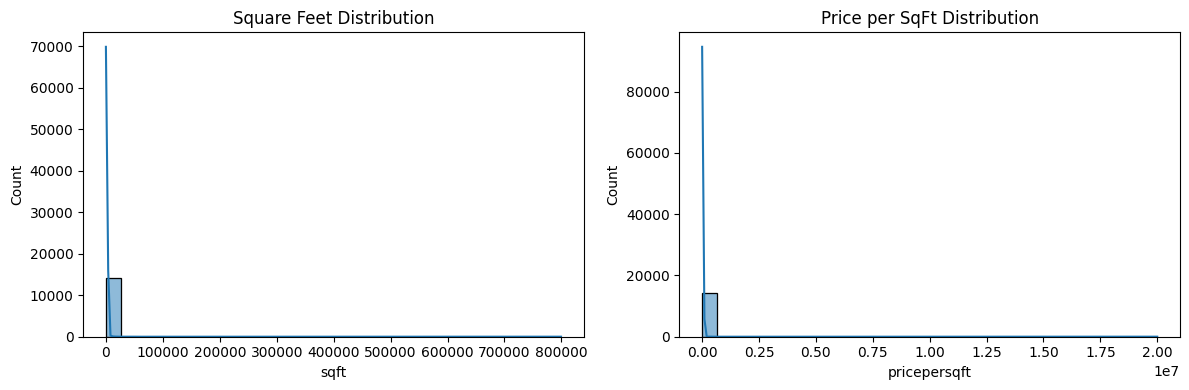

In [63]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.histplot(dataset['sqft'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Square Feet Distribution')
sns.histplot(dataset['pricepersqft'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Price per SqFt Distribution')
plt.tight_layout()
plt.savefig('hist_sqft_pricepersqft.png')

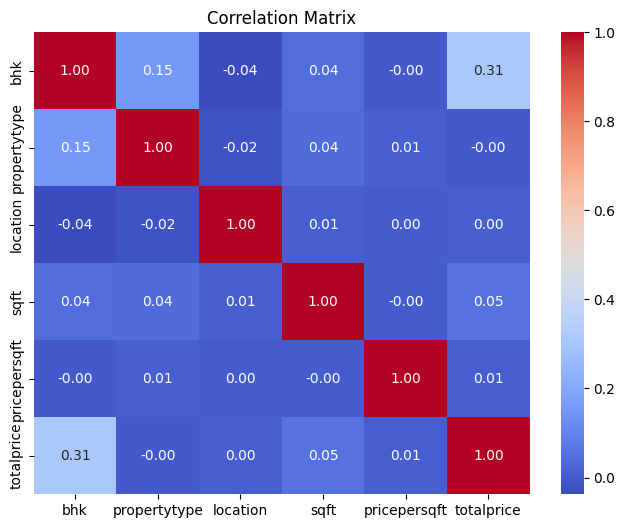

In [64]:
# Convert categorical to numeric codes
df_corr = dataset.copy()
df_corr['propertytype'] = df_corr['propertytype'].astype('category').cat.codes
df_corr['location'] = df_corr['location'].astype('category').cat.codes

corr = df_corr.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig('heatmap_correlation.png')

In [65]:
# Prepare features & target
X = dataset.drop(columns=['totalprice', 'pricepersqft'])
y = dataset['totalprice']

In [66]:
X

,bhk,propertytype,location,sqft
0,3,Flat,Ahmedabad,1346
1,4,Flat,Ahmedabad,1872
2,4,Flat,Ahmedabad,1650
3,5,Flat,Ahmedabad,10201
4,3,Flat,Ahmedabad,968
...,...,...,...,...
14114,2,House,Warangal,1000
14115,2,House,Warangal,1710
14116,2,House,Warangal,800
14117,2,House,Warangal,1591


In [67]:
y

0        15700000
1        17500000
2        20200000
3        86700000
4        10400000
           ...   
14114     9000000
14115    14000000
14116     2600000
14117    15000000
14118     7000000
Name: totalprice, Length: 14119, dtype: int64

In [68]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

7. Preprocessing Pipeline

In [69]:
cat_cols = ['propertytype','location']
num_cols = ['bhk','sqft','pricepersqft']

In [70]:
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
], remainder='passthrough')

8. Train Models and Evaluate

In [71]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=100, random_state=42),
    'CatBoost': CatBoostRegressor(n_estimators=100, verbose=0, random_state=42)
}


In [72]:
results = {}
for name, mdl in models.items():
    pipe = Pipeline([('preprocessor', preprocessor), ('model', mdl)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_valid)
    results[name] = {
        'MAE': mean_absolute_error(y_valid, preds),
        'R2': r2_score(y_valid, preds)
    }

results_df = pd.DataFrame(results).T.sort_values(by='R2', ascending=False)
print(results_df)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 384
[LightGBM] [Info] Number of data points in the train set: 11295, number of used features: 61
[LightGBM] [Info] Start training from score 12737107.368305


c:\Users\harin\OneDrive\Desktop\house_price_prediction\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


                            MAE        R2
LightGBM           5.083560e+06  0.335354
XGBoost            4.973597e+06  0.317315
CatBoost           5.345756e+06  0.228931
Random Forest      5.363267e+06  0.218428
Linear Regression  6.976598e+06  0.197326


9. Compare Models

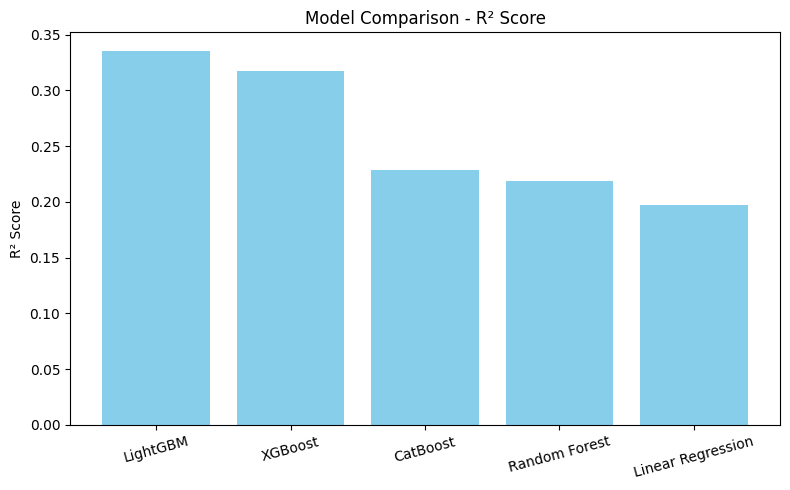

In [73]:
# Histogram for R² Score
plt.figure(figsize=(8,5))
plt.bar(results_df.index, results_df['R2'], color='skyblue')
plt.ylabel("R² Score")
plt.title("Model Comparison - R² Score")
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig("model_r2_comparison.png")
plt.show()

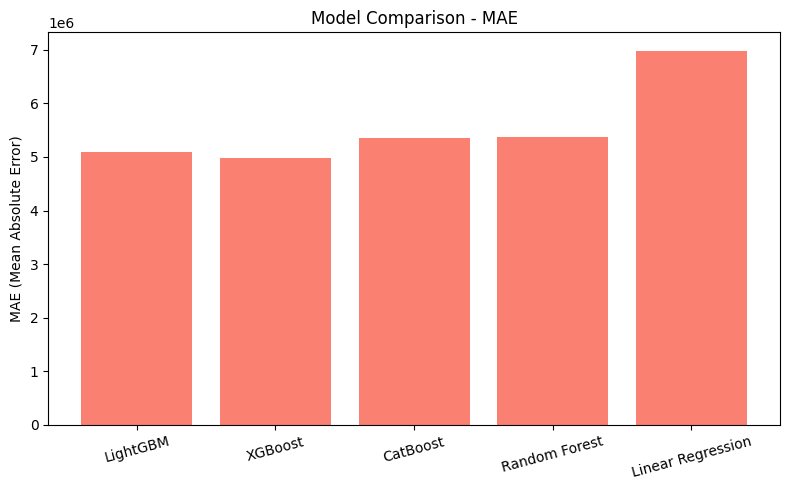

In [74]:
# Histogram for MAE
plt.figure(figsize=(8,5))
plt.bar(results_df.index, results_df['MAE'], color='salmon')
plt.ylabel("MAE (Mean Absolute Error)")
plt.title("Model Comparison - MAE")
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig("model_mae_comparison.png")
plt.show()

In [75]:
final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LGBMRegressor(n_estimators=100, random_state=42))
])
final_pipeline.fit(X, y)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 384
[LightGBM] [Info] Number of data points in the train set: 14119, number of used features: 61
[LightGBM] [Info] Start training from score 12766995.889369


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [76]:
%pip install num2words


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
import pandas as pd
from num2words import num2words

# Input data (no actual price)
test_input = pd.DataFrame([
    {
        'bhk': 6,
        'propertytype': 'Flat',
        'location': 'chennai',
        'sqft': 14000,
    },
    {
        'bhk': 4,
        'propertytype': 'Villa',
        'location': 'chennai',
        'sqft': 6975,
    }
])

# Predict using the trained pipeline
predicted_prices = final_pipeline.predict(test_input)

# Show results
for i, price in enumerate(predicted_prices):
    price_int = int(price)
    price_words = num2words(price_int, to='cardinal', lang='en_IN').replace(",", "")
    print(f"🏠 Input {i+1} -> Predicted House Price: ₹{price_int:,} ({price_words.capitalize()} rupees)")


🏠 Input 1 -> Predicted House Price: ₹135,102,033 (Thirteen crore fifty-one lakh two thousand and thirty-three rupees)
🏠 Input 2 -> Predicted House Price: ₹85,677,889 (Eight crore fifty-six lakh seventy-seven thousand eight hundred and eighty-nine rupees)


c:\Users\harin\OneDrive\Desktop\house_price_prediction\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


10. Save the Best Model

In [78]:
import os

In [79]:
# Step 1: Get the best model name based on R²
best_model_name = max(results, key=lambda x: results[x]['R2'])
print(f"\n✅ Best Model: {best_model_name}")

# Step 2: Get the best model instance from the dictionary
best_model = models[best_model_name]

# Step 3: Recreate the pipeline using the full dataset
final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', best_model)
])

# Step 4: Train the final pipeline on the full dataset
final_pipeline.fit(X, y)

# Step 5: Save the trained pipeline to the "models" directory
os.makedirs('models', exist_ok=True)  # Create folder if it doesn't exist
joblib.dump(final_pipeline, 'models/best_house_price_model.pkl')
print("✅ Model saved successfully as 'models/best_house_price_model.pkl'")



✅ Best Model: LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 384
[LightGBM] [Info] Number of data points in the train set: 14119, number of used features: 61
[LightGBM] [Info] Start training from score 12766995.889369
✅ Model saved successfully as 'models/best_house_price_model.pkl'
